## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframes

In [2]:
# Define path
path = r'/Users/isaacotubanjo/Documents/08:08:2023 Instacart Business Analysis'

In [3]:
# Import orders_products_aggregated.pkl as df_ords_prods
df_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

## Creating Visualisations

<Axes: >

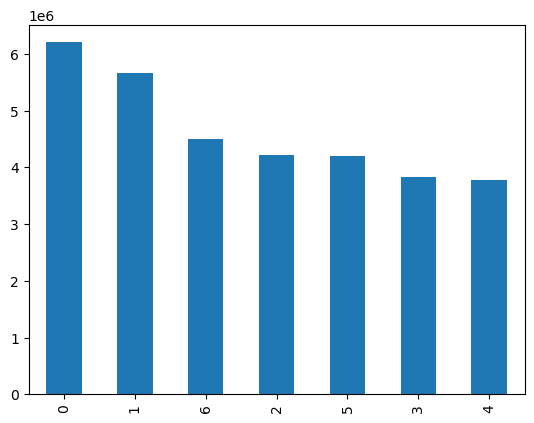

In [4]:
# Creating Bar Charts
df_ords_prods['order_day_of_week'].value_counts().plot.bar()

<Axes: >

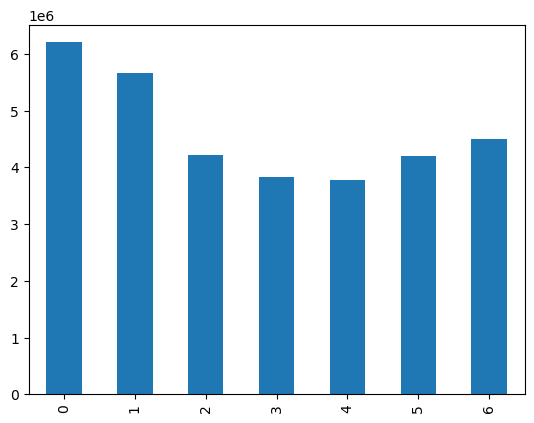

In [5]:
# To sort by index position
df_ords_prods['order_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: >

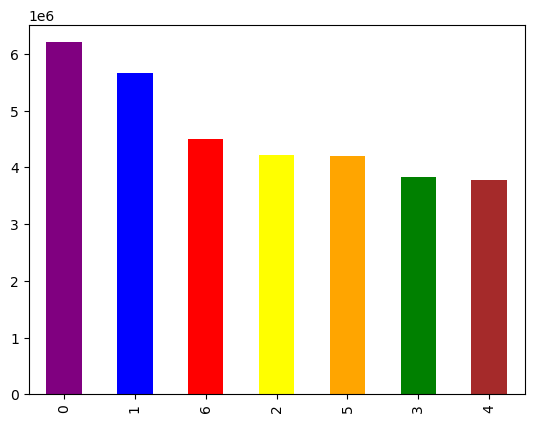

In [7]:
# To add colours to the chart
df_ords_prods['order_day_of_week'].value_counts().plot.bar(color =['purple', 'blue', 'red', 'yellow', 'orange', 'green', 'brown'])

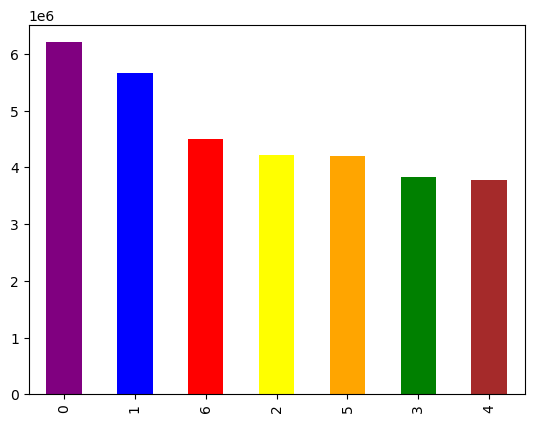

In [8]:
# To export plot/chart
bar = df_ords_prods['order_day_of_week'].value_counts().plot.bar(color =['purple', 'blue', 'red', 'yellow', 'orange', 'green', 'brown'])

In [9]:
# To export the chart as a png file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histogram

<Axes: ylabel='Frequency'>

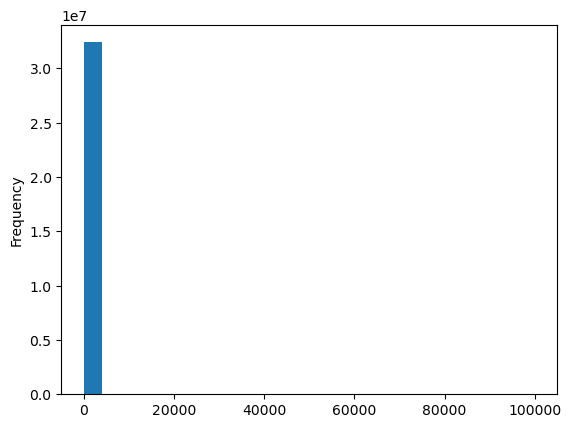

In [10]:
# Creating Histograms
df_ords_prods['prices'].plot.hist(bins = 25)

### Creating a Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

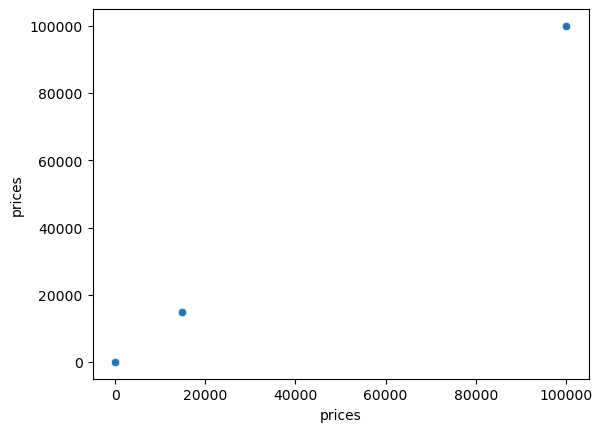

In [11]:
# Creating Scatterplots
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods)

In [12]:
# To check for outliers in the data due to the position of the points
df_ords_prods.loc[df_ords_prods['prices'] > 100]
# This will return prices higher than 100

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day_of_week,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [13]:
# Replacing all rows with prices higher than 100 with missing values
df_ords_prods.loc[df_ords_prods['prices'] > 100, 'prices'] = np.nan

In [15]:
df_ords_prods['prices'].max()

25.0

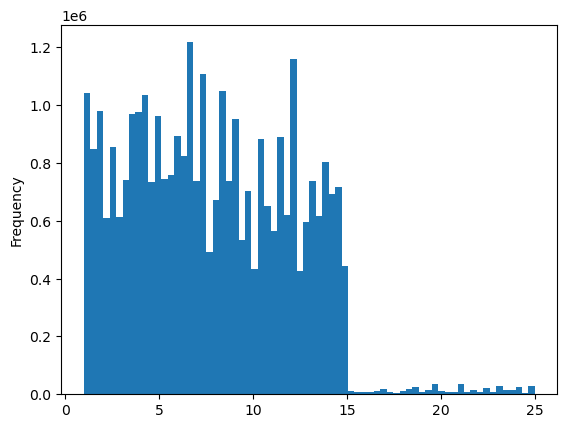

In [17]:
# Recreating the histogram
hist = df_ords_prods['prices'].plot.hist(bins = 70)

In [18]:
# To export the chart as a png file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## Creating Samples

In [22]:
# Using a 70/30 split to create a list holding True/False values
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods)) <= 0.7

In [23]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [24]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods[dev]

In [25]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods[~dev]

In [26]:
# Calculating the length of the dataframe
len(df_ords_prods)

32404859

In [27]:
# Confirming the results of the samples
len(big) + len(small)

32404859

In [1]:
# Creating a new sample dataframe containing only the required columns
df_2 = small[['order_day_of_week', 'prices']]

NameError: name 'small' is not defined

### Creating a Line Chart

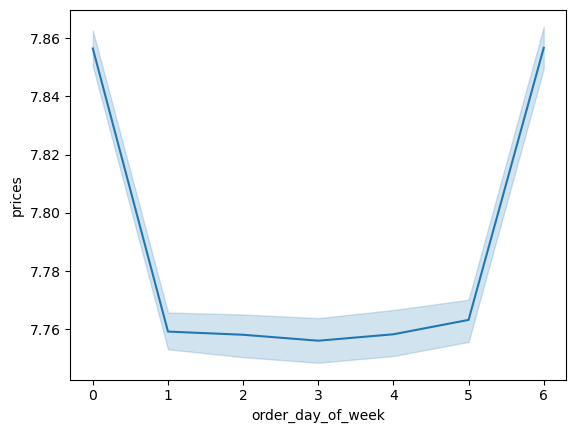

In [29]:
# Creating line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')